# COGS 108 - Can Money Buy Happiness? The Relationship Between GDP Growth and Self-Reported Happiness

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

Our project looks at data collected about the GDP of various different countries as well as the other factors (freedom, trust in government, etc.). We wanted to understand if GDP was predictive of a sustained change in the happiness level of different countries as indicated by self-report. What we found is that GDP per capita (rather than GDP in absolute terms) was significantly predictive of happiness. In fact the percent of variance (R2) of GDP per capita and the happiness score was 0.55 (55% variance in happiness score explained by GDP per capita). However, GDP per capita is not the only contributing factor since an interaction effect was present between GDP per capita and other factors (life expectancy and freedom).

# Names

- Raam Chaklashiya
- Gaurav Mahindru
- Phap Nguyen
- Taekyu Lee

<a id='research_question'></a>
# Research Question

Is an increase in GDP predictive of sustained increase in levels of happiness as measured by self-report?


<a id='background'></a>

## Background & Prior Work

There is this assumption that much of the psychological distress that people experience can be rectified by material prosperity. This idea has saturated modern culture to such a degree that Abraham Maslow, one of the prominent humanistic psychologists of the twentieth century, even listed material abundance as a prerequisite for further psychological development (3). However, is this truly the case? Does society progressing towards a more Utopian end lead the individual to experience a greater sense of happiness? Numerous existential psychologists would argue that material abundance can’t lead to happiness because material abundance is a shallow pursuit as opposed to the pursuit of meaning or enlightenment (4).

There is research that demonstrates a positive correlation between GDP and mean life satisfaction (2). However, the criticisms of that research is that other factors (level of freedom, access to education, etc.) play more of a contributing factor than what the GDP happened to be that year. There is also criticism that the scales for life satisfaction don’t in fact measure happiness but instead measure levels of depression and anxiety and that happiness is not just the mere absence of emotional pain. To try to address these concerns, we plan to use a dataset that shows the score of happiness for each country as well as a series of other factors (freedom, generosity, life expectancy, etc.) to determine what is predictive of self-reported happiness.


References (include links):
- 1) https://www.kaggle.com/unsdsn/world-happiness
- 2) https://econreview.berkeley.edu/beyond-gdp-economics-and-happiness/
- 3) A Theory of Human Motivation by Abraham Maslow
- 4) https://www.ted.com/talks/viktor_frankl_why_believe_in_others

# Hypothesis


Our hypothesis is that an increase in GDP  will lead to a persistent tendency to report an increase in happiness. We believe an increase in GDP  creates a buffer against catastrophes (unemployment, market crash, etc.) and absolute privation, leading to a reduction in negative emotions such as anxiety and a greater likelihood of one reporting oneself as happy.

# Datasets

- Dataset Name: World Happiness Report
- Link to the dataset: https://www.kaggle.com/unsdsn/world-happiness
- Number of observations: 158 (2015), 157 (2016), 155 (2017), 156 (2018), 156 (2019).

The World Happiness Report is a dataset that contains the survey of global happiness by country on a scale from 0-10 from the years 2015-2019. Also includes data on the impact of economic production, social support, life expectancy, freedom, absence of corruption, and generosity.


- Dataset Name: World GDP (current US$)
- Link to the dataset: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
- Number of observations: 266 countries/regions.

World GDP is a dataset from the trustworthy organization, “The World Bank’’, that contains information about the Gross Domestic Product of hundreds of countries/regions around the world from 1960-2020 in USD.

We plan to combine the datasets by first combining the 5 happiness dataframes after dropping irrelevant columns. Then, we drop all the years besides 2015-2019 from the GDP dataset and drop any countries that are missing data in that time period and merge it with the happiness dataset, which gets rid of any countries not present in both datasets.

# Setup

As setup, we import relevant libraries and modules that will help us manipulate and visualize our data (1). Then we import various sklearn metrics that will be used to assess the amount of error in our linear regression models (2). We also have some code that helps format our data and maintain consistency, such as suppressing scientific notation to display two decimal places (3). Patsy and scipy.stats are used to assess the significance of the relationship between our variables (4). Lastly, we include a linear model for multivariable regression from statsmodels.regression (5).

In [1]:
# (1)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set()
sns.set_context('talk')

# (2)
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# (3)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 104)
pd.options.display.float_format = '{:20,.2f}'.format

# (4)
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# (5)
from statsmodels.regression import linear_model

## Data
To preface, let's take a look at some of the variables in our happiness datasets:

* GDP per capita (gdp_per_capita)
* family 
* life expectancy (life_expectancy)
* freedom 
* generosity
* Trust in government (gov_trust)

These are the variables we are most concerned with which will be stored as columns in our final dataframe and in a list to allow certain routine operations to be applied to all the varibles using a for loop. According to the Kaggle description, these variables "describe the extent to which these factors contribute in evaluating the happiness in each country".

First, we read in the datasets and take a look at the first few entries to get an idea of what kind of data we are working with. The GDP dataset has 4 rows of header info before the dataset begins so we need to skip those rows in order to read in the data.

In [2]:
happy_2015 = pd.read_csv('2015.csv')
happy_2016 = pd.read_csv('2016.csv')
happy_2017 = pd.read_csv('2017.csv')
happy_2018 = pd.read_csv('2018.csv')
happy_2019 = pd.read_csv('2019.csv')

world_gdp = pd.read_csv('World GDP.csv', skiprows = 4)

In [3]:
happy_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.59,0.03,1.40,1.35,0.94,0.67,0.42,0.30,2.52
1,Iceland,Western Europe,2,7.56,0.05,1.30,1.40,0.95,0.63,0.14,0.44,2.70
2,Denmark,Western Europe,3,7.53,0.03,1.33,1.36,0.87,0.65,0.48,0.34,2.49
3,Norway,Western Europe,4,7.52,0.04,1.46,1.33,0.89,0.67,0.37,0.35,2.47
4,Canada,North America,5,7.43,0.04,1.33,1.32,0.91,0.63,0.33,0.46,2.45


In [4]:
happy_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.53,7.46,7.59,1.44,1.16,0.80,0.58,0.44,0.36,2.74
1,Switzerland,Western Europe,2,7.51,7.43,7.59,1.53,1.15,0.86,0.59,0.41,0.28,2.69
2,Iceland,Western Europe,3,7.50,7.33,7.67,1.43,1.18,0.87,0.57,0.15,0.48,2.83
3,Norway,Western Europe,4,7.50,7.42,7.58,1.58,1.13,0.80,0.60,0.36,0.38,2.66
4,Finland,Western Europe,5,7.41,7.35,7.47,1.41,1.13,0.81,0.57,0.41,0.25,2.83


In [5]:
happy_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.54,7.59,7.48,1.62,1.53,0.80,0.64,0.36,0.32,2.28
1,Denmark,2,7.52,7.58,7.46,1.48,1.55,0.79,0.63,0.36,0.40,2.31
2,Iceland,3,7.50,7.62,7.39,1.48,1.61,0.83,0.63,0.48,0.15,2.32
3,Switzerland,4,7.49,7.56,7.43,1.56,1.52,0.86,0.62,0.29,0.37,2.28
4,Finland,5,7.47,7.53,7.41,1.44,1.54,0.81,0.62,0.25,0.38,2.43


In [6]:
happy_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.63,1.30,1.59,0.87,0.68,0.20,0.39
1,2,Norway,7.59,1.46,1.58,0.86,0.69,0.29,0.34
2,3,Denmark,7.55,1.35,1.59,0.87,0.68,0.28,0.41
3,4,Iceland,7.50,1.34,1.64,0.91,0.68,0.35,0.14
4,5,Switzerland,7.49,1.42,1.55,0.93,0.66,0.26,0.36


In [7]:
happy_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.77,1.34,1.59,0.99,0.60,0.15,0.39
1,2,Denmark,7.60,1.38,1.57,1.00,0.59,0.25,0.41
2,3,Norway,7.55,1.49,1.58,1.03,0.60,0.27,0.34
3,4,Iceland,7.49,1.38,1.62,1.03,0.59,0.35,0.12
4,5,Netherlands,7.49,1.40,1.52,1.00,0.56,0.32,0.30


In [8]:
world_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"405,463,417.12","487,602,457.75","596,423,607.11","695,304,363.03","764,887,117.19","872,138,715.08","958,463,184.36","1,082,979,720.67","1,245,688,268.16","1,320,474,860.34","1,379,960,893.85","1,531,944,134.08","1,665,100,558.66","1,722,798,882.68","1,873,452,513.97","1,920,111,731.84","1,941,340,782.12","2,021,229,050.28","2,228,491,620.11","2,330,726,256.98","2,424,581,005.59","2,615,083,798.88","2,745,251,396.65","2,498,882,681.56","2,390,502,793.30","2,549,720,670.39","2,534,636,871.51","2,727,849,720.67","2,790,849,162.01","2,962,905,027.93","2,983,636,871.51","3,092,430,167.60","3,202,188,606.93",NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,"19,342,484,576.07","19,753,490,586.36","21,526,615,650.18","25,772,356,399.46","23,563,232,194.74","26,851,350,246.21","29,196,502,381.86","30,219,070,807.10","32,927,067,005.12","37,801,761,961.03","40,377,109,505.12","44,544,318,706.81","48,374,959,174.21","63,079,306,618.93","78,369,918,525.20","83,562,484,550.13","83,337,002,756.53","95,133,441,245.39","106,507,911,956.87","124,687,609,417.30","156,750,816,224.43","160,622,014,029.32","154,904,633,221.86","160,000,530,886.79","146,244,041,211.69","130,638,242,469.06","147,248,826,582.45","180,012,868,627.78","189,290,783,786.71","194,839,284,973.21","212,659,048,041.38","221,099,527,491.91","220,553,773,354.05","220,949,576,765.65","225,099,507,739.26","253,136,239,804.91","252,550,100,522.62","265,549,158,043.64","250,377,799,052.05","247,067,404,757.78","268,315,059,658.71","242,105,498,360.00","247,656,772,651.86","326,744,217,914.73","405,860,474,812.75","471,742,666,480.47","533,533,468,219.31","613,164,396,848.23","668,037,143,166.04","670,986,478,460.58","805,794,703,846.20","898,604,749,625.80","915,590,443,628.77","930,086,422,789.75","958,824,753,165.02","895,440,123,119.35","856,991,850,399.32","964,790,654,430.54","986,610,722,363.10","980,371,628,600.08","900,828,558,644.12",NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,"537,777,811.11","548,888,895.56","546,666,677.78","751,111,191.11","800,000,044.44","1,006,666,637.78","1,399,999,966.67","1,673,333,417.78","1,373,333,366.67","1,408,888,922.22","1,748,886,595.56","1,831,108,971.11","1,595,555,475.56","1,733,333,264.44","2,155,555,497.78","2,366,666,615.56","2,555,555,566.67","2,953,333,417.78","3,300,000,108.89","3,697,940,409.61","3,641,723,322.00","3,478,787,909.09",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"4,055,179,566.35","4,515,558,808.11","5,226,778,808.89","6,209,137,624.77","6,971,285,594.68","9,747,879,531.86","10,109,225,813.67","12,439,087,076.77","15,856,574,731.44","17,804,292,964.10","20,001,598,505.70","20,561,069,558.22","20,484,885,119.73","19,907,111,418.99","18,017,749,073.64","18,869,945,678.42","18,353,881,129.52","19,291,104,007.61","19,807,067,268.11",NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,"10,407,321,640.35","11,131,302,981.48","11,946,843,968.96","12,680,220,415.26","13,842,621,612.17","14,866,816,736.92","15,837,474,342.61","14,430,648,806.73","14,884,699,923.35","16,887,028,427.89","23,511,477,699.80","20,838,908,163.48","25,272,340,677.87","31,282,962,685.67","44,227,412,162.11","51,459,772,973.11","62,147,555,473.81","65,334,104,528.29","71,220,525,032.83","88,654,314,397.81","112,064,063,500.95","211,065,184,009.68","187,218,448,133.40","138,155,586,596.24","114,296,077,828.18","116,541,346,400.57","107,528,

We can see that the happiness datasets have slight differences in the column names, which we will have to account for when cleaning and combining the data. In the GDP dataset, there are a lot of columns of years outside of the time period we are interested in, so we will have to drop those.

# Data Cleaning

The first thing we want to do is combine all of our happiness datasets, so let's take a look at the shape of our data. We can do this by creating a list of the datasets and printing the shape of each one with a for loop.

In [9]:
data_sets = [happy_2015,happy_2016,happy_2017,
             happy_2018,happy_2019,world_gdp]

for data_set in data_sets:
    print(data_set.shape)

(158, 12)
(157, 13)
(155, 12)
(156, 9)
(156, 9)
(266, 66)


From the shape of the dataframes, we can tell that there are different numbers of countries for each year, so we will have to make sure we only include countries we have both GDP and happiness data for in order to maintain accuracy. This will automatically be done when we later merge (on country) the combined happiness dataframe with the GDP dataframe.

Here, we drop all of the columns of the happiness datasets besides the country/region name, the corresponding happiness score, and a few other variables we will later analyze the interaction effects of. Certain columns were dropped (dystopia residual, region, etc.) either because they were not present in all of the datasets or were not a valid predictor for happiness scores. For the GDP dataset we drop all columns except the relevant years (2015-2019) and the country name.

In [10]:
happy_2015 = happy_2015[['Country','Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)'
                         ,'Freedom','Trust (Government Corruption)','Generosity']]
happy_2016 = happy_2016[['Country','Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)'
                         ,'Freedom','Trust (Government Corruption)','Generosity']]
happy_2017 = happy_2017[['Country','Happiness.Score','Economy..GDP.per.Capita.','Family','Health..Life.Expectancy.'
                         ,'Freedom','Generosity','Trust..Government.Corruption.']]
happy_2018 = happy_2018[['Country or region','Score','GDP per capita','Social support','Healthy life expectancy'
                         ,'Freedom to make life choices','Generosity','Perceptions of corruption']]
happy_2019 = happy_2019[['Country or region','Score','GDP per capita','Social support','Healthy life expectancy'
                         ,'Freedom to make life choices','Generosity','Perceptions of corruption']]

world_gdp = world_gdp[['Country Name', '2015', '2016', '2017', '2018', '2019']]

To prepare our dataframes for merging, we need to have the column names consistent with one another, so we normalize the column names to all be lowercase and simplify some of the longer names. The 2018 and 2019 happiness datasets have slightly different column names than the 2015-2017 datasets, so we make sure that we have a consistent naming scheme for all five years. For the GDP dataset, we rename the years to the year followed by 'GDP' for more clarity.

In [11]:
happy_2015 = happy_2015.rename(columns = {'Country':'country','Happiness Score':'happiness_score'
                                          ,'Economy (GDP per Capita)': 'gdp_per_capita','Family':'family'
                                          ,'Health (Life Expectancy)': 'life_expectancy', 'Freedom': 'freedom'
                                          ,'Trust (Government Corruption)': 'gov_trust','Generosity':'generosity'})
happy_2016 = happy_2016.rename(columns = {'Country':'country','Happiness Score':'happiness_score'
                                          ,'Economy (GDP per Capita)': 'gdp_per_capita','Family':'family'
                                          ,'Health (Life Expectancy)': 'life_expectancy', 'Freedom': 'freedom'
                                          ,'Trust (Government Corruption)': 'gov_trust','Generosity':'generosity'})
happy_2017 = happy_2017.rename(columns = {'Country':'country','Happiness.Score':'happiness_score'
                                          ,'Economy..GDP.per.Capita.': 'gdp_per_capita','Family':'family'
                                          ,'Health..Life.Expectancy.': 'life_expectancy', 'Freedom': 'freedom'
                                          ,'Trust..Government.Corruption.': 'gov_trust','Generosity':'generosity'})
happy_2018 = happy_2018.rename(columns = {'Country or region':'country','Score':'happiness_score'
                                          ,'GDP per capita': 'gdp_per_capita','Social support':'family'
                                          ,'Healthy life expectancy': 'life_expectancy'
                                          ,'Freedom to make life choices': 'freedom','Perceptions of corruption': 'gov_trust'
                                          ,'Generosity':'generosity'})
happy_2019 = happy_2019.rename(columns = {'Country or region':'country','Score':'happiness_score'
                                          ,'GDP per capita': 'gdp_per_capita','Social support':'family'
                                          ,'Healthy life expectancy': 'life_expectancy'
                                          ,'Freedom to make life choices': 'freedom','Perceptions of corruption': 'gov_trust'
                                          ,'Generosity':'generosity'})

world_gdp = world_gdp.rename(columns = {'Country Name' : 'country','2015' : '2015 GDP','2016' : '2016 GDP','2017' : '2017 GDP'
                                        ,'2018' : '2018 GDP','2019' : '2019 GDP'})

Here, we make sure the order of the columns for the happiness dataframes are consistent with one another to prepare them for concatenating.

In [12]:
happy_2015 = happy_2015[['country','gdp_per_capita','family',
                       'life_expectancy','freedom','generosity','gov_trust'
                       ,'happiness_score']]

happy_2016 = happy_2016[['country','gdp_per_capita','family',
                       'life_expectancy','freedom','generosity','gov_trust'
                       ,'happiness_score']]

happy_2017 = happy_2017[['country','gdp_per_capita','family',
                       'life_expectancy','freedom','generosity','gov_trust'
                       ,'happiness_score']]

happy_2018 = happy_2018[['country','gdp_per_capita','family',
                       'life_expectancy','freedom','generosity','gov_trust'
                       ,'happiness_score']]

happy_2019 = happy_2019[['country','gdp_per_capita','family',
                       'life_expectancy','freedom','generosity','gov_trust'
                       ,'happiness_score']]

We can now concatanate the happiness dataframes into a single dataframe called 'happy' to get ready for analysis, which we once again reorder to the same format as above.

In [13]:
happy = pd.concat([happy_2015,happy_2016,happy_2017,happy_2018,happy_2019], axis = 0, ignore_index= True, sort=True,)

happy = happy[['country','gdp_per_capita','family',
                       'life_expectancy','freedom','generosity','gov_trust'
                       ,'happiness_score']]
happy

,country,gdp_per_capita,family,life_expectancy,freedom,generosity,gov_trust,happiness_score
0,Switzerland,1.40,1.35,0.94,0.67,0.30,0.42,7.59
1,Iceland,1.30,1.40,0.95,0.63,0.44,0.14,7.56
2,Denmark,1.33,1.36,0.87,0.65,0.34,0.48,7.53
3,Norway,1.46,1.33,0.89,0.67,0.35,0.37,7.52
4,Canada,1.33,1.32,0.91,0.63,0.46,0.33,7.43
...,...,...,...,...,...,...,...,...
777,Rwanda,0.36,0.71,0.61,0.56,0.22,0.41,3.33
778,Tanzania,0.48,0.89,0.50,0.42,0.28,0.15,3.23
779,Afghanistan,0.35,0.52,0.36,0.00,0.16,0.03,3.20
780,Central African Republic,0.03,0.00,0.10,0.23,0.23,0.04,3.08


Here, we drop all rows with missing values from our GDP dataframe for the years 2015-2019. There are no missing values in our merged happiness dataset so we don't need to worry about dropping anything else from there.

In [14]:
world_gdp = world_gdp.dropna(how = 'any')
world_gdp

,country,2015 GDP,2016 GDP,2017 GDP,2018 GDP,2019 GDP
1,Africa Eastern and Southern,"895,440,123,119.35","856,991,850,399.32","964,790,654,430.54","986,610,722,363.10","980,371,628,600.08"
2,Afghanistan,"19,907,111,418.99","18,017,749,073.64","18,869,945,678.42","18,353,881,129.52","19,291,104,007.61"
3,Africa Western and Central,"757,492,080,699.65","687,484,728,475.59","680,989,095,100.78","738,131,279,381.97","792,078,923,887.67"
4,Angola,"116,193,649,124.15","101,123,851,090.46","122,123,822,333.59","101,353,230,784.59","89,417,190,341.25"
5,Albania,"11,386,846,319.16","11,861,200,797.47","13,019,693,450.88","15,147,020,535.39","15,286,612,572.69"
...,...,...,...,...,...,...
260,Samoa,"788,307,330.56","799,376,439.53","832,153,612.56","821,496,064.53","852,250,190.99"
261,Kosovo,"6,442,915,788.31","6,719,172,016.83","7,245,707,184.82","7,942,961,738.31","7,953,156,068.07"
263,South Africa,"317,620,522,794.83","296,357,282,715.11","349,554,116,683.82","368,288,939,768.32","351,431,649,241.44"
264,Zambia,"21,251,216,798.78","20,958,412,538.31","25,873,601,260.84","26,311,637,646.65","23,308,688,906.13"


Now we create a column of the average GDP over the 2015-2019 time period and reduce the GDP dataframe to only the country name and average GDP column. These averages will be used in the analysis. We are interested in comparing GDP in absolute terms and GDP per capita as predictors of happiness scores. In other words, is the wealthy of a country in absolute terms more predictive of happiness scores than the wealth of individuals in said country.

In [15]:
world_gdp['average_gdp'] = (world_gdp['2015 GDP'] + world_gdp['2016 GDP'] + world_gdp['2017 GDP'] + world_gdp['2018 GDP'] + world_gdp['2019 GDP'])/5

world_gdp = world_gdp[['country','average_gdp']]

world_gdp

,country,average_gdp
1,Africa Eastern and Southern,"936,840,995,782.48"
2,Afghanistan,"18,887,958,261.64"
3,Africa Western and Central,"731,235,221,509.13"
4,Angola,"106,042,348,734.81"
5,Albania,"13,340,274,735.12"
...,...,...
260,Samoa,"818,716,727.63"
261,Kosovo,"7,260,782,559.27"
263,South Africa,"336,650,502,240.70"
264,Zambia,"23,540,711,430.14"


Finally, we merge the concatenated happiness dataframe with the simplified GDP dataframe to get our final dataframe that we will be working with during the analysis. Merging on country name has the added benefit of dropping countries/regions that are not present in both dataframes. Then we reorder the columns of this new 'happy_merged' dataframe with the happiness score on the far right, as that will be our dependent y-variable.

In [16]:
happy_merged = happy.merge(world_gdp, on = 'country')

happy_merged = happy_merged[['country','gdp_per_capita','family',
                       'life_expectancy','freedom','generosity','gov_trust','average_gdp'
                       ,'happiness_score']]

happy_merged

,country,gdp_per_capita,family,life_expectancy,freedom,generosity,gov_trust,average_gdp,happiness_score
0,Switzerland,1.40,1.35,0.94,0.67,0.30,0.42,"713,907,090,047.92",7.59
1,Switzerland,1.53,1.15,0.86,0.59,0.28,0.41,"713,907,090,047.92",7.51
2,Switzerland,1.56,1.52,0.86,0.62,0.29,0.37,"713,907,090,047.92",7.49
3,Switzerland,1.42,1.55,0.93,0.66,0.26,0.36,"713,907,090,047.92",7.49
4,Switzerland,1.45,1.53,1.05,0.57,0.26,0.34,"713,907,090,047.92",7.48
...,...,...,...,...,...,...,...,...,...
678,Namibia,0.93,0.70,0.35,0.49,0.08,0.10,"12,239,832,930.96",4.57
679,Namibia,0.96,1.10,0.34,0.52,0.08,0.09,"12,239,832,930.96",4.57
680,Namibia,0.87,1.28,0.36,0.52,0.05,0.06,"12,239,832,930.96",4.44
681,Namibia,0.88,1.31,0.48,0.40,0.07,0.06,"12,239,832,930.96",4.64


We also create a list of independent variables that will be used during the analysis in order to simplify our code and allow routine operations to be applied more easily.

In [17]:
independent_variables = ['gdp_per_capita','family','life_expectancy',
                         'freedom','generosity','gov_trust',
                         'average_gdp']

# Data Analysis & Results

## Descriptive Analysis 

The first step was to run .describe and to show standard statistics (mean, maximum value, minimum value, upper quartile, etc.) for each of the different columns.

In [18]:
# descriptive statistics for the happy_merged data 
happy_merged.describe()

,gdp_per_capita,family,life_expectancy,freedom,generosity,gov_trust,average_gdp,happiness_score
count,683.00,683.00,683.00,683.00,683.00,682.00,683.00,683.00
mean,0.92,1.09,0.62,0.42,0.22,0.13,"551,843,630,871.07",5.44
std,0.41,0.33,0.25,0.15,0.12,0.11,"2,071,857,068,769.26",1.14
min,0.00,0.00,0.00,0.00,0.00,0.00,"1,080,135,076.41",2.69
25%,0.63,0.88,0.45,0.33,0.14,0.06,"16,283,116,338.59",4.52
50%,0.99,1.13,0.66,0.44,0.20,0.09,"58,678,763,645.93",5.40
75%,1.24,1.34,0.81,0.54,0.28,0.16,"309,163,718,491.77",6.32
max,2.10,1.64,1.14,0.72,0.84,0.55,"19,714,288,214,000.00",7.77


A series of histplots were created to show the distribution of values for each of the columns (including happiness scores, the variable we are trying to predict). This shows the distribution of different values across all the different countries in this dataset. 

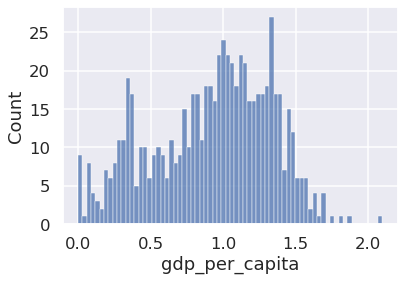

In [19]:
# a histplot of the GDP per capita of all the countries 
# distribution is mostly normal except with a few spikes on the left 
sns.histplot(happy_merged['gdp_per_capita'], bins = 70);

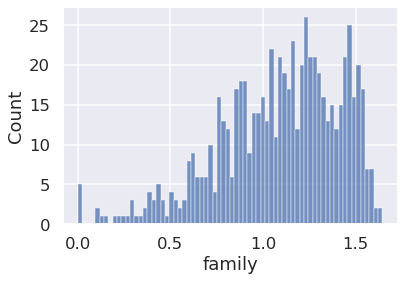

In [20]:
# a count plot of the family of all the countries 
# distribution skews mostly to the right 
sns.histplot(happy_merged['family'], bins = 70);

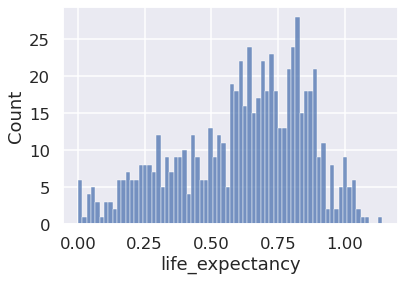

In [21]:
# a countplot of the life expectancy of all the countries 
# distribution skews mostly to the right 
sns.histplot(happy_merged['life_expectancy'], bins = 70);

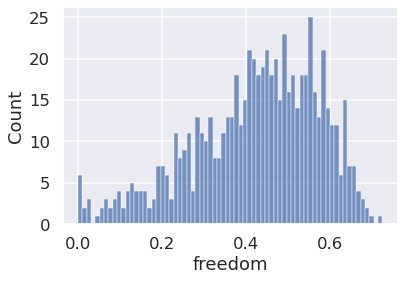

In [22]:
# a countplot of how free people feel of all the countries
# distribution skews mostly to the right 
sns.histplot(happy_merged['freedom'], bins = 70);

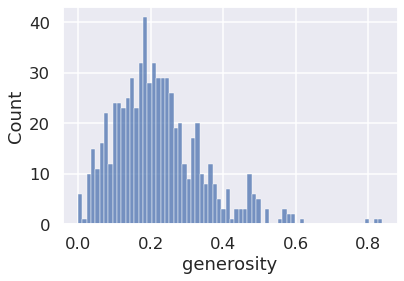

In [23]:
# a countplot of how generous people think they are in all of the countries
# distribution skews mostly to the left 
sns.histplot(happy_merged['generosity'], bins = 70);

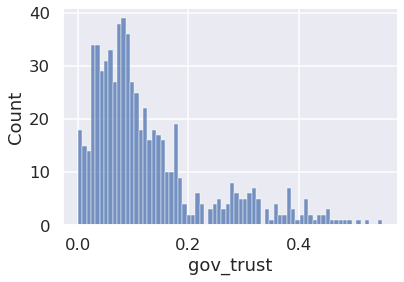

In [24]:
# countplot for how much trust people have in the government in all countries
# distribution skews mostly to the left 
sns.histplot(happy_merged['gov_trust'], bins = 70);

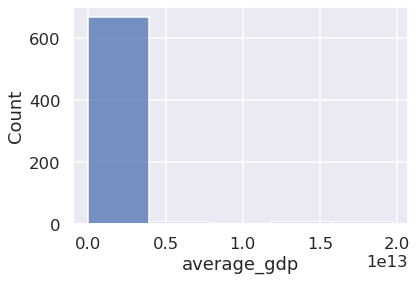

In [25]:
# countplot for the average GDP of all the countries
# a massive spike toward the values towards the left 
sns.histplot(happy_merged['average_gdp'], bins = 5);

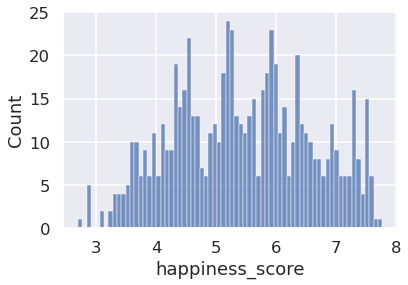

In [26]:
# countplot of the happiness scores of all countries
# distribution mostly clups in the center 
sns.histplot(happy_merged['happiness_score'], bins = 70);

A for loop was created to calculate the range of each of the independent variables (the variables we will be using as factors to predict happiness scores, the dependent variable.

In [27]:
# the range for all the independent variables

# a for loop runs to calculate and print the range for each of the independent variables
for variable in independent_variables:
    the_range = happy_merged[variable].max() - happy_merged[variable].min()
    print('Range for',variable,the_range)

Range for gdp_per_capita 2.096
Range for family 1.644
Range for life_expectancy 1.141
Range for freedom 0.724
Range for generosity 0.838075160980225
Range for gov_trust 0.55191
Range for average_gdp 19713208078923.59


This line calculates and prints the range of happiness scores across all the countries.

In [28]:
# calculate and print the range of the happiness scores
print(happy_merged['happiness_score'].max()-happy_merged['happiness_score'].min())

5.07599992179871


## Inferential Analysis

A t-test between each independent variable and happiness scores were run with an alpha level of 0.05 (95% confidence interval) to determine if there is a statistically significant relationship between the independent variable and happiness scores or if it is just due to chance. This process was repeated for all the independent variables using a for loop.

In [29]:
# the t-test and p-value for each of the independent variables in relationship to the happiness score
for variable in independent_variables:
    print('\t The ttest for ',variable)
    print(ttest_ind(happy_merged[variable],happy_merged['happiness_score']))
    
# all of the independent variables have a significant relationship with the happiness score
# the only exceptions are average gdp and trust in government

	 The ttest for  gdp_per_capita
Ttest_indResult(statistic=-97.4613749555684, pvalue=0.0)
	 The ttest for  family
Ttest_indResult(statistic=-95.83465169009145, pvalue=0.0)
	 The ttest for  life_expectancy
Ttest_indResult(statistic=-108.07666355954278, pvalue=0.0)
	 The ttest for  freedom
Ttest_indResult(statistic=-113.99895174752395, pvalue=0.0)
	 The ttest for  generosity
Ttest_indResult(statistic=-118.97186134125805, pvalue=0.0)
	 The ttest for  gov_trust
Ttest_indResult(statistic=nan, pvalue=nan)
	 The ttest for  average_gdp
Ttest_indResult(statistic=6.960919236038389, pvalue=5.2369630291749785e-12)


A plot was created for each of the predicting variables and the happiness scores to provide a visual representation of the relationships. This, like the t-test step, used a for loop to make a plot for each predicting variable.

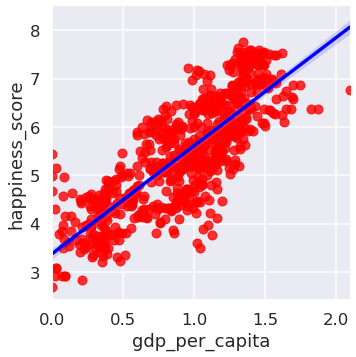

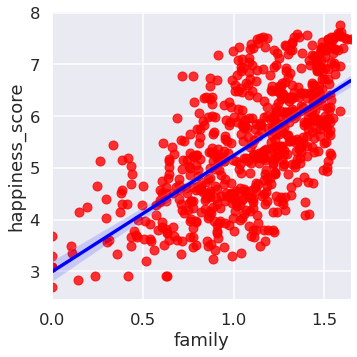

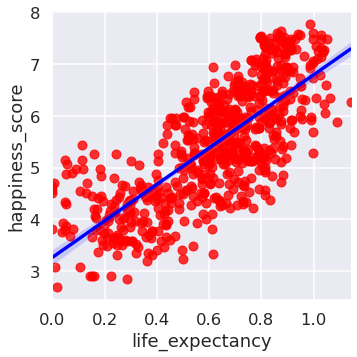

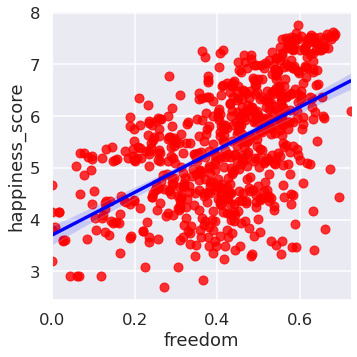

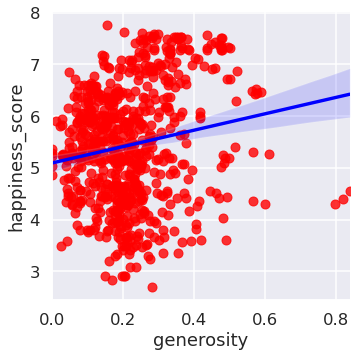

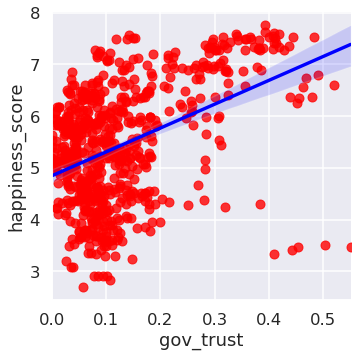

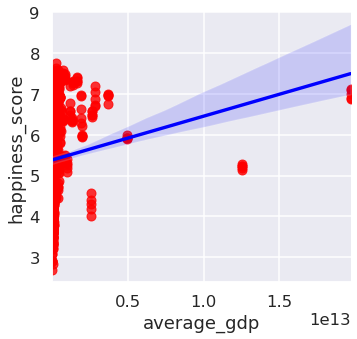

In [30]:
# for loop runs to graph relationship of each independent variable and the happiness score
for variable in independent_variables:
    sns.lmplot(
        x = variable,
        y = 'happiness_score',
        data = happy_merged,
        scatter_kws = {'color':'red'},
        line_kws = {'color':'blue'}
    )

Here, we want to create a series of simple (only one variable for prediction) linear regressions for each of the independent variables to predict the dependent variable (happiness scores). Below, a function is defined to do the following:

1. Define the x variable as the independent variable being assessed.
2. Define the y variable (what is being predicted) as the happiness score.
3. Fill any missing values in both x and y with zeros to avoid errors.
4. Reshape x array to be compatible with predicting y
5. Splitting the data into training and testing data (20% for traning with random state of 200)

6. Selecting the linear regression model and training it using the training data.

7. Using the newly trained model to predict y. 

Along with the function that uses each independent variable to make a prediction of happiness scores,  two other functions are defined. One of them (called linear plotting), shows the predicted relationship derived from the linear regression model in relation to the acutal values that are scatted across the plot. The other function shows a wide variety of metrics for assessing error (MSE, Mean absolute error, etc.) as well as other metrics (R2 score, y-intercept of line, coefficient of the line, etc.).

In [31]:
def linear_regression_model(X1):
    '''function to make a linear regression prediction model 
    based on a single independent variable'''
    
    # select one of the independent variables, replace missing values with 0s, and reshape data 
    X = happy_merged[X1].fillna(0).values.reshape(-1,1)
    
    # select the dependent variable (happiness_score) and fill missing values with 0s
    y = happy_merged['happiness_score'].fillna(0).values
    
    # split data for training and testing (20% data used for training with 200 random state)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 200)
    
    # define the prediction model (linear regression)
    regressor = LinearRegression()
    
    # fit/train the linear regression using the traning data
    regressor.fit(X_train, y_train)
    
    # predict the happiness scores using the testing data 
    y_pred = regressor.predict(X_test)
    
    def linear_plotting():
        '''plot the data '''
        plt.scatter(X_train, y_train, color = "red")
        plt.plot(X_test, y_pred, color = "green")
        plt.title('Relationship between '+X1+' and the happiness score')
        plt.xlabel(X1)
        plt.ylabel('happiness_score')
        plt.show()
        
    def display_metrics():
        '''Display different metrics of error/accuracy as well as the 
        y-intercept and coefficient of each regression'''
        print('The Y-intercept is',regressor.intercept_)
        print('The coefficent of regression: ',regressor.coef_)
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        print('R2 score:', r2_score(y_test, y_pred,multioutput='variance_weighted'))
        
    
    # call these two functions so they display after the linear regression model is fitted to the data 
    linear_plotting()
    display_metrics()

The functions that train the linear model, plot the results, and show metrics is repeated to each independent variable using a for loop

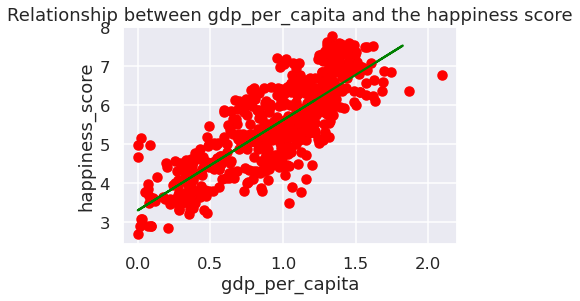

The Y-intercept is 3.304496864640901
The coefficent of regression:  [2.31882028]
Mean Absolute Error: 0.5883555131663943
Mean Squared Error: 0.5144218901438165
Root Mean Squared Error: 0.7172321033973705
R2 score: 0.5560921089279529


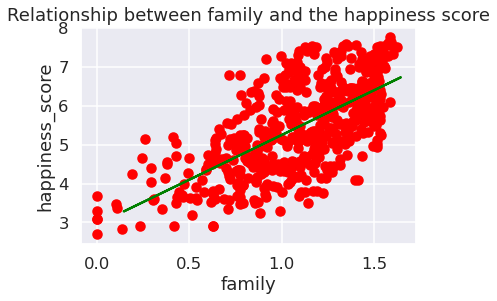

The Y-intercept is 2.9445341696645992
The coefficent of regression:  [2.3014576]
Mean Absolute Error: 0.7444144288126482
Mean Squared Error: 0.8381648124095814
Root Mean Squared Error: 0.9155134146529921
R2 score: 0.27672600762864785


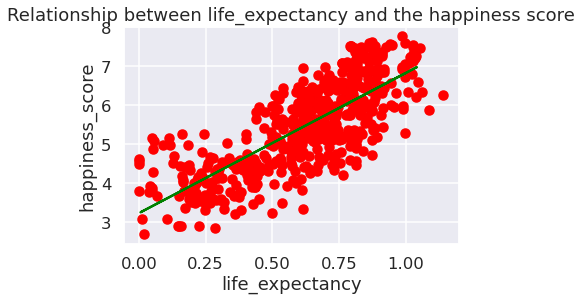

The Y-intercept is 3.2334348628965093
The coefficent of regression:  [3.59797247]
Mean Absolute Error: 0.5954648833963974
Mean Squared Error: 0.555131135516224
Root Mean Squared Error: 0.7450712284850516
R2 score: 0.5209630531730592


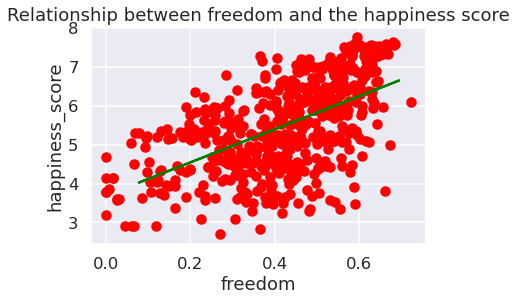

The Y-intercept is 3.6967854290664857
The coefficent of regression:  [4.23474401]
Mean Absolute Error: 0.7685136405682056
Mean Squared Error: 0.971593460646349
Root Mean Squared Error: 0.9856944053033623
R2 score: 0.16158699239191554


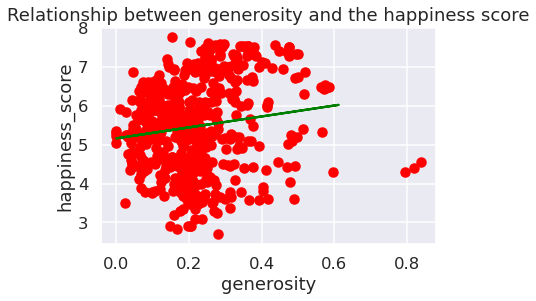

The Y-intercept is 5.1596218786247094
The coefficent of regression:  [1.4043169]
Mean Absolute Error: 0.875754817140531
Mean Squared Error: 1.1074207129947953
Root Mean Squared Error: 1.0523405879252188
R2 score: 0.04437815992319416


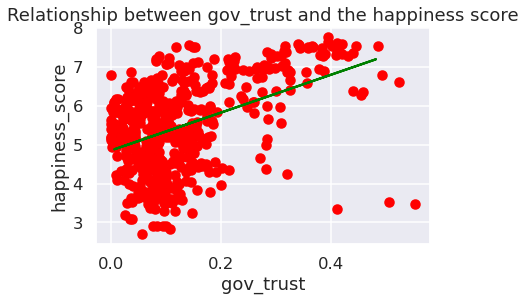

The Y-intercept is 4.848046364170363
The coefficent of regression:  [4.87220896]
Mean Absolute Error: 0.83054849715534
Mean Squared Error: 1.0603225950761763
Root Mean Squared Error: 1.0297196681991543
R2 score: 0.08502033825831867


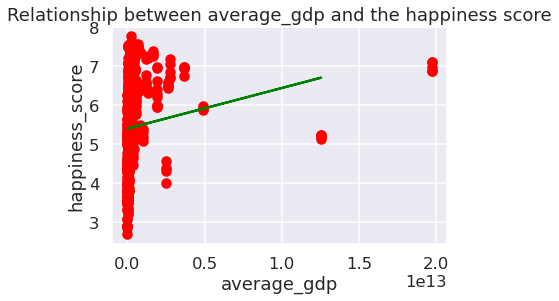

The Y-intercept is 5.403124998373132
The coefficent of regression:  [1.04190242e-13]
Mean Absolute Error: 0.8879506246358141
Mean Squared Error: 1.1412701285268443
Root Mean Squared Error: 1.068302451802318
R2 score: 0.015168627920867485


In [32]:
# run a for loop to train a linear regression model, graph relationship, and show metrics of accuracy/error 
# Do this for each independent variable

for variable in independent_variables:
    linear_regression_model(variable)

This time, instead of using a simple linear regression (one X variable predicts one Y variable), we will be using a multivariate (multiple X/independent variables) to predict the happiness scores. The steps are virtually identical to what we used with the simple linear regression. 

In [33]:
# linear regression using multiple independent variables instead of one at a time 

# define the independent variables that will be used for prediction
# fill in any missing values in the dataframe with zeros 
X = happy_merged[['gdp_per_capita','family','life_expectancy',
                         'freedom','generosity','gov_trust','average_gdp'
                        ]].fillna(0)

# define the happiness score as the variable trying to be predicted
# fill in any missing values in the dataframe with zeros 
y = happy_merged['happiness_score'].fillna(0)

# split the data into training data and testing data (20% for training with random state of 200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 200)

# select the prediction model (in this case a multiple linear regression)
regressor = LinearRegression()

# train the model using the training data
regressor.fit(X_train, y_train)

# use the model to predict the happiness score using the testing data
y_pred = regressor.predict(X_test)

# create a dataframe to show the coefficients of each variable in the multiple linear regression 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

# display the dataframe
coeff_df

,Coefficient
gdp_per_capita,1.23
family,0.52
life_expectancy,1.09
freedom,1.38
generosity,0.66
gov_trust,1.09
average_gdp,0.00


Here, we defined a new dataframe above to display the coefficients of the multivariate regression. The magnitude of the coefficients tell us which independent variables are the most influential on happiness scores. 


The dataframe below provides a comparision between the happiness scores that are multivariate regression predicted and what the actual happiness scores were as provided by the dataset. 

In [34]:
# define a dataframe to compare the actual happiness scores (y_test) with the predicted happiness scores (y_pred)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# display the data frame 
df

,Actual,Predicted
390,5.69,6.30
330,5.17,5.67
176,6.29,6.67
313,5.63,5.96
301,5.59,4.89
...,...,...
314,5.89,6.04
494,4.57,3.71
144,6.71,6.26
621,3.68,3.82


Below, we have a display of various error metrics. This informs us about the accuracy in prediction of our multivariate regression.

In [35]:
# display the Mean Absolute Error, MSE, and Root Mean Squared Error for the multiple linear regression model above
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.46844551910061405
Mean Squared Error: 0.36013200094878517
Root Mean Squared Error: 0.6001099907090243


In this stage of the data analysis, we need to know whether an interaction effect occurred in our multivariate regression. An interaction effect is when the effect of one variable on an outcome is shaped by another variable. This means that it is possible that whatever influence GDP per capita has on happiness scores might come from another variable's (freedom, trust in government, life expectancy, etc.) influence on GDP per capita. To account for this, we created a dataframe with possible interactions (life expectancy influence on GDP per capita, trust in government influence on GDP per capita, etc.). 

In [36]:
#generating interaction terms
x_interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X)

#creating a new dataframe with the interaction terms included
interaction_df = pd.DataFrame(x_interaction, columns = ['gdp_per_capita',
                                                        'family','life_expectancy','freedom',
                                                        'generosity','gov_trust','average_gdp',
                                                        
                                                        'gdp_per_capita:family','gdp_per_capita:life_expectancy',
                                                        'gdp_per_capita:freedom','gdp_per_capita:generosity',
                                                        'gdp_per_capita:gov_trust','gdp_per_capita:average_gdp',
                                                        
                                                        'family:life_expectancy','family:freedom','family:generosity',
                                                        'family:gov_trust','family:average_gdp',
                                                        
                                                        'life_expectancy:freedom','life_expectancy:generosity','life_expectancy:gov_trust',
                                                        'life_expectancy:average_gdp',
                                                        
                                                        'freedom:generosity','freedom:gov_trust','freedom:average_gdp',
                                                        
                                                        'generosity:gov_trust','generosity:average_gdp',
                                                       'gov_trust:average_gdp'])                                                

After creating this dataframe, a new linear model was trained using the happiness scores from the dataset (y) and the new dataframe. 

In [37]:
# fit the linear regression to show relationship between happiness scores and the interaction variables
interaction_model = linear_model.OLS(y,interaction_df).fit()

After the linear model was trained, we decided to display significant interactions (interactions that had a p value of less than 0.05)

In [38]:
# print all the interaction variables who have a p-value less than 0.05
# this shows that the interaction between the variables is not simply due to chance

# any values with no significance won't display
interaction_model.pvalues[interaction_model.pvalues < 0.05]

gdp_per_capita                                   0.00
family                                           0.00
freedom                                          0.00
generosity                                       0.00
average_gdp                                      0.05
gdp_per_capita:family                            0.01
gdp_per_capita:life_expectancy                   0.02
gdp_per_capita:generosity                        0.00
family:freedom                                   0.02
family:generosity                                0.00
family:gov_trust                                 0.00
life_expectancy:generosity                       0.00
life_expectancy:average_gdp                      0.02
freedom:generosity                               0.00
freedom:gov_trust                                0.00
dtype: float64

It actually turns out that GDP per capita does have an interaction effect with family, life expectancy, and generosity. 

# Ethics & Privacy

There may be a number of bias concerns in the data we decided to use.

A potential bias in our datasets might be that a significant portion of the data collected came from westernized (countries with liberal democracies) nations that are already industrialized as opposed to non-western developing countries. This may be due to the fact that developing countries don't have the infrastructure to support large-scale data collection. This might be problematic because it won't be so easy to generalize the conclusion of this project. Is GDP predictive of happiness for all nations or only nations that are industrialized and have a liberal democracy? Another potential concern is our preconceived notions. A data scientist who is very materialistically orientated may have already concluded that money can buy happiness and as soon as they see a significant relationship between GDP and happiness scores, will stop scrutizing the analysis. On the contrary, someone who is more inclined towards spiritual pursuits will see money as an impediment to happiness and will also stop further questioning after observing no significant relationship between GDP and happiness scores. To try and account for this, we didn't just look at GDP's impact on happiness alone. Instead, we looked at a variety of different factors (life expectancy, trust in government, personal freedom, etc.) to observe any interaction effects to be sure if changes in happiness are solely due to GDP or GDP interaction with another variable. 

To detect specific biases during communication, we will remember to stress that it is entirely possible that any relationship between GDP and happiness scores could be shaped by interaction effects. As for data privacy, it seems that this won't be the primary concern since most of the survey data collected about citizen's happiness was done anonymously and by a trustworthy source.

To try and account for the data collection bias that over represents western countries, we used happiness reports from a recent 5 year period (2015-2019). The reason for this is that survey collecting infastructure is likely to have gotten better for developing countries in recent times. Thus, they are more likely to be representative.

Since our world GDP dataset mainly consisted of country scale and the world happiness dataset collected with an anonymous poll, we were able to be relatively less concerned about individual privacy. However, we learned that privacy is important to prioritize even if the datasets are open to the public. 

# Conclusion & Discussion

From the use of the simple and multivariate regression, we can conclude that an increase in GDP per capita is generally predictive of an increase in the happiness rating of that country. GDP in absolute terms (derived by the average GDP from 2015-2019) showed no significant relationship or predictive capacity with respect to happiness ratings. In the simple linear regression, GDP per capita accounted for 55% of the variance in happiness scores. In the multivariate regression, GDP per capita had the second largest magnitude coefficient (the largest was freedom).


The limitations of our project is we can't fully show how much of the influence of GDP per capita on happiness ratings is a consequence of GDP per capita by itself or an interaction between GDP per capita and some other variable. In this project, we did demonstrate that GDP per capita had a statistically significant interaction effect present with family, life expectancy, and generosity. However, we don't know how prevalent the interaction effect was or if there were any confounding variables. Maybe people having greater freedom over their life choices allows them to be more economically produtive as well as more satisfied with their work. In that case, freedom would be the confounding variable between GDP per capita and happiness ratings. 

The impact of this work on society is that people will continue to believe that there is a direct link between economic prosperity and personal happiness. People might start to think that personal satisfaction can be attained as an end by reaching a higher level of economic prosperity. However, it is important to point out that while GDP per capita rise is predictive of increased happiness scores to some extent, it is not the whole picture. Aside from GDP per capita, life expectancy and how free people are were also significant predictors of increased happiness ratings. Another possible impact on society is people will start to acknowledge that material prosperity alone is not enough to attain personal satisfaction. Factors such as personal health and autonomy should also be valued instead of GDP alone to produce a happier populace. 

# Team Contributions

- Raam Chaklashiya
    * Datasets
    * Setup, Data Cleaning + Step by Step markdowns
    * Proofreading

- Gaurav Mahindru

    * trained the linear models as well as multivariate regression models to see which factors were most predictive of happiness scores
    * Created a dataframe in order to show potential interaction effects between different predicting variables

    * Created for loops to run a t test and assessement of error for each of the linear regression models for each independent variable   


- Phap Nguyen
    * Data Cleaning and Wrangling
    * Initial Exploratory Data Analysis


- Taekyu Lee
   * Ethics & Privacy
   * Overall markdown descriptions & video editing

# Above and Beyond Justification (for bonus points as stated on syllabus)

There were a number of techniques that we applied to go above and beyond on this project. The first is the conciseness of the code. At every opportunity, we used functions and for loops to perform repetivite tasks instead of simply rewriting the code multiple times over. An example of this was when we defined a function to generate a simple linear regression prediction model. We stored the names of each independent variable in a list. We then used the list and a for loop to apply the function that generated a simple linear regression model for each of the independent variables rather than having to train_test_split each time. The same approach was used for plotting the results of each linear regression as well as showing error metrics. A function was applied to each independent variable utilizing a for loop rather than having to make a new plot for each linear regression manually. 


The other way in which our code went above and beyond is in showing the presence of interaction effects. Instead of cutting down the dataset only to GDP and happiness scores, we kept the other predictive variables and showed significant interaction effects with a  p-value less than 0.05. The point of this was to not assume that all the variation in happiness scores could be explained by GDP per capita alone and instead that other variables may have influenced GDP per capita leading to change in happiness scores. 